Data Visualizations

In [2]:
#For the "Median value of owner-occupied homes" provide a boxplot


In [1]:
'''Task 1: Become familiar with the dataset
The following describes the dataset variables:

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's'''

"Task 1: Become familiar with the dataset\nThe following describes the dataset variables:\n\n·      CRIM - per capita crime rate by town\n\n·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.\n\n·      INDUS - proportion of non-retail business acres per town.\n\n·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)\n\n·      NOX - nitric oxides concentration (parts per 10 million)\n\n·      RM - average number of rooms per dwelling\n\n·      AGE - proportion of owner-occupied units built prior to 1940\n\n·      DIS - weighted distances to five Boston employment centres\n\n·      RAD - index of accessibility to radial highways\n\n·      TAX - full-value property-tax rate per $10,000\n\n·      PTRATIO - pupil-teacher ratio by town\n\n·      LSTAT - % lower status of the population\n\n·      MEDV - Median value of owner-occupied homes in $1000's"

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Setting seed for reproducibility
np.random.seed(0)

# Generating synthetic data
n_samples = 506
df_synthetic = pd.DataFrame({
    'CRIM': np.random.rand(n_samples) * 10,
    'ZN': np.random.rand(n_samples) * 100,
    'INDUS': np.random.rand(n_samples) * 30,
    'CHAS': np.random.choice([0, 1], size=n_samples),
    'NOX': np.random.rand(n_samples) * 0.1 + 0.4,
    'RM': np.random.rand(n_samples) * 3 + 3,
    'AGE': np.random.rand(n_samples) * 100,
    'DIS': np.random.rand(n_samples) * 10,
    'RAD': np.random.randint(1, 25, size=n_samples),
    'TAX': np.random.randint(200, 800, size=n_samples),
    'PTRATIO': np.random.rand(n_samples) * 10 + 12,
    'LSTAT': np.random.rand(n_samples) * 30,
    'MEDV': np.random.rand(n_samples) * 50
}) 

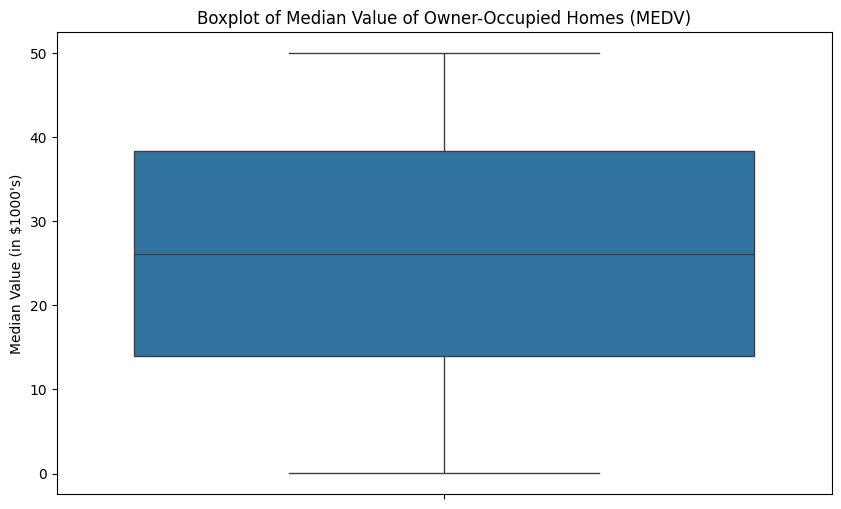

In [19]:
# Boxplot for the Median value of owner-occupied homes (MEDV)
plt.figure(figsize=(10, 6))
sns.boxplot(y=df_synthetic['MEDV'])
plt.title('Boxplot of Median Value of Owner-Occupied Homes (MEDV)')
plt.ylabel('Median Value (in $1000\'s)')
plt.show() 

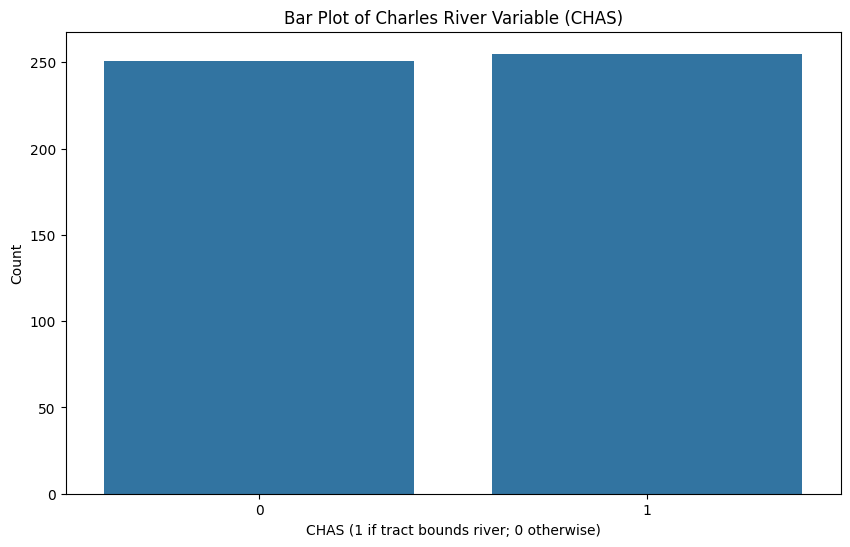

In [27]:
# Bar plot for the Charles river variable (CHAS)
plt.figure(figsize=(10, 6))
sns.countplot(x=df_synthetic['CHAS'])
plt.title('Bar Plot of Charles River Variable (CHAS)')
plt.xlabel('CHAS (1 if tract bounds river; 0 otherwise)')
plt.ylabel('Count')
plt.show()


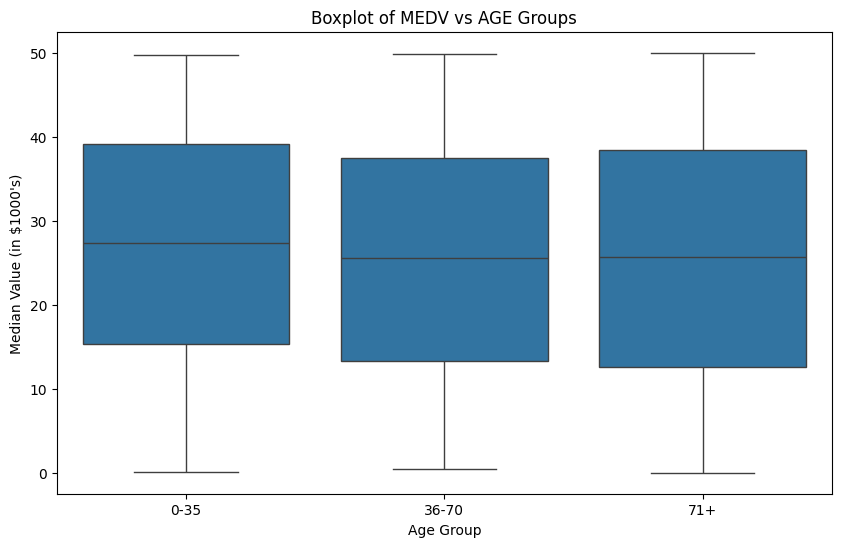

In [21]:
# Boxplot for MEDV vs AGE (discretized into three groups)
df_synthetic['AGE_GROUP'] = pd.cut(df_synthetic['AGE'], bins=[0, 35, 70, 100], labels=['0-35', '36-70', '71+'])
#pd.cut() function is pandas function of partition into the given bins

plt.figure(figsize=(10, 6))
sns.boxplot(x=df_synthetic['AGE_GROUP'], y=df_synthetic['MEDV'])
plt.title('Boxplot of MEDV vs AGE Groups')
plt.xlabel('Age Group')
plt.ylabel('Median Value (in $1000\'s)')
plt.show() 

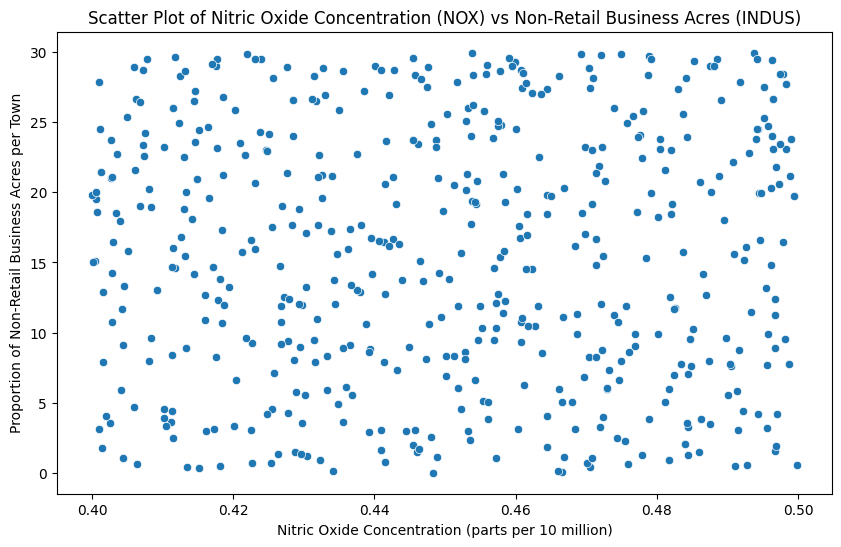

In [22]:
# Scatter plot for Nitric Oxide Concentration (NOX) vs Proportion of Non-Retail Business Acres (INDUS)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_synthetic['NOX'], y=df_synthetic['INDUS'])
plt.title('Scatter Plot of Nitric Oxide Concentration (NOX) vs Non-Retail Business Acres (INDUS)')
plt.xlabel('Nitric Oxide Concentration (parts per 10 million)')
plt.ylabel('Proportion of Non-Retail Business Acres per Town')
plt.show() 

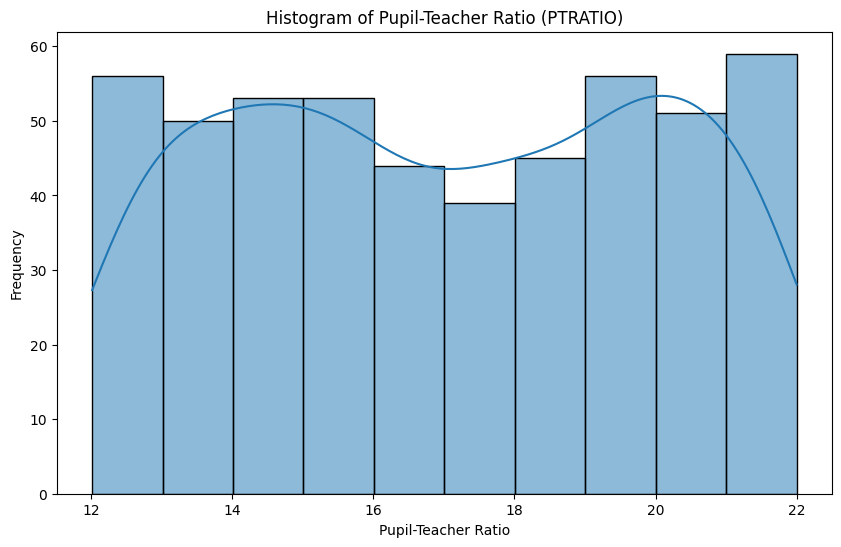

In [23]:
# Histogram for the Pupil-Teacher Ratio (PTRATIO)
plt.figure(figsize=(10, 6))
sns.histplot(df_synthetic['PTRATIO'], bins=10, kde=True)
plt.title('Histogram of Pupil-Teacher Ratio (PTRATIO)')
plt.xlabel('Pupil-Teacher Ratio')
plt.ylabel('Frequency')
plt.show() 

Question 1: Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

In [28]:
from scipy.stats import ttest_ind

# Extracting MEDV values for houses bounded and not bounded by Charles river
medv_bounded = df_synthetic[df_synthetic['CHAS'] == 1]['MEDV']
medv_not_bounded = df_synthetic[df_synthetic['CHAS'] == 0]['MEDV']

# Performing T-test
t_statistic, p_value = ttest_ind(medv_bounded, medv_not_bounded)

# Output results
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")


T-statistic: 1.4543328762477896
P-value: 0.14647649484567787


Question 2: Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

In [29]:
from scipy.stats import f_oneway

# Performing one-way ANOVA
f_statistic, p_value = f_oneway(df_synthetic[df_synthetic['AGE_GROUP'] == '0-35']['MEDV'],
                                df_synthetic[df_synthetic['AGE_GROUP'] == '36-70']['MEDV'],
                                df_synthetic[df_synthetic['AGE_GROUP'] == '71+']['MEDV'])

# Output results
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")


F-statistic: 0.2044036658138716
P-value: 0.815200937169523


Question 3: Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

In [30]:
from scipy.stats import pearsonr

# Performing Pearson correlation
corr_coef, p_value = pearsonr(df_synthetic['NOX'], df_synthetic['INDUS'])

# Output results
print(f"Pearson correlation coefficient: {corr_coef}")
print(f"P-value: {p_value}")


Pearson correlation coefficient: -0.0029060667296692865
P-value: 0.9480077384200337


Question 4: What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [31]:
import statsmodels.api as sm

# Prepare the data for regression analysis
X = df_synthetic['DIS']  # predictor variable (DIS)
y = df_synthetic['MEDV']  # response variable (MEDV)

# Add constant to the predictor variable X
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print summary of regression analysis
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.2140
Date:                Fri, 21 Jun 2024   Prob (F-statistic):              0.644
Time:                        19:08:17   Log-Likelihood:                -2069.8
No. Observations:                 506   AIC:                             4144.
Df Residuals:                     504   BIC:                             4152.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.4733      1.278     19.935      0.0